In [1]:
# import necessary tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# ignore warnings
import warnings
warnings.filterwarnings(action="ignore")

# clustering
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from matplotlib import cm
from sklearn.metrics import silhouette_samples, silhouette_score

In [244]:
# reading the Data
df1 = pd.read_csv('credit_card.csv')
df1.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
# dataset Information
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

Dataset contains 8950 entries and have 18 features

In [4]:
# Descriptive Statistics of Data
df1.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [5]:
# Chategorical variables
df1.select_dtypes('object').columns

Index(['CUST_ID'], dtype='object')

In this dataset there are only one categorical variable And it's CUST_ID  variable that is unique for every record

## Exploratory Data Analysis

### (a) Missing Value Analysis

In [6]:
df1.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In this dataset only 2 feature are having Missing values , which can be treated 

In [7]:
# CREDIT_LIMIT
df1.CREDIT_LIMIT.isnull().sum()

1

1 missing value

In [8]:
df1.CREDIT_LIMIT.describe()

count     8949.000000
mean      4494.449450
std       3638.815725
min         50.000000
25%       1600.000000
50%       3000.000000
75%       6500.000000
max      30000.000000
Name: CREDIT_LIMIT, dtype: float64

In [9]:
# Using median value to replace missing value
df1['CREDIT_LIMIT'] = df1['CREDIT_LIMIT'].fillna(df1['CREDIT_LIMIT'].median())

In [10]:
# MINIMUM_PAYMENTS
df1.MINIMUM_PAYMENTS.isnull().sum()

313

In [11]:
df1.MINIMUM_PAYMENTS.describe()

count     8637.000000
mean       864.206542
std       2372.446607
min          0.019163
25%        169.123707
50%        312.343947
75%        825.485459
max      76406.207520
Name: MINIMUM_PAYMENTS, dtype: float64

In [12]:
# filling null using meadian
df1['MINIMUM_PAYMENTS'] = df1['MINIMUM_PAYMENTS'].fillna(df1['MINIMUM_PAYMENTS'].median())

In [13]:
df1.MINIMUM_PAYMENTS.isnull().sum()

0

### (b) Outlier Treatment using the Z-score method

Customer ID seems to be an unique id for each customer and hence won't play any role in determining the cluster.

In [14]:
df1.drop(['CUST_ID'], axis=1, inplace=True)

Let's visualize how skewed our dataset is.

In [15]:
cc = df1.copy()

In [16]:
# Numerical 
cc_Numeric = cc.select_dtypes(exclude='object')
print(cc_Numeric.columns)

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')


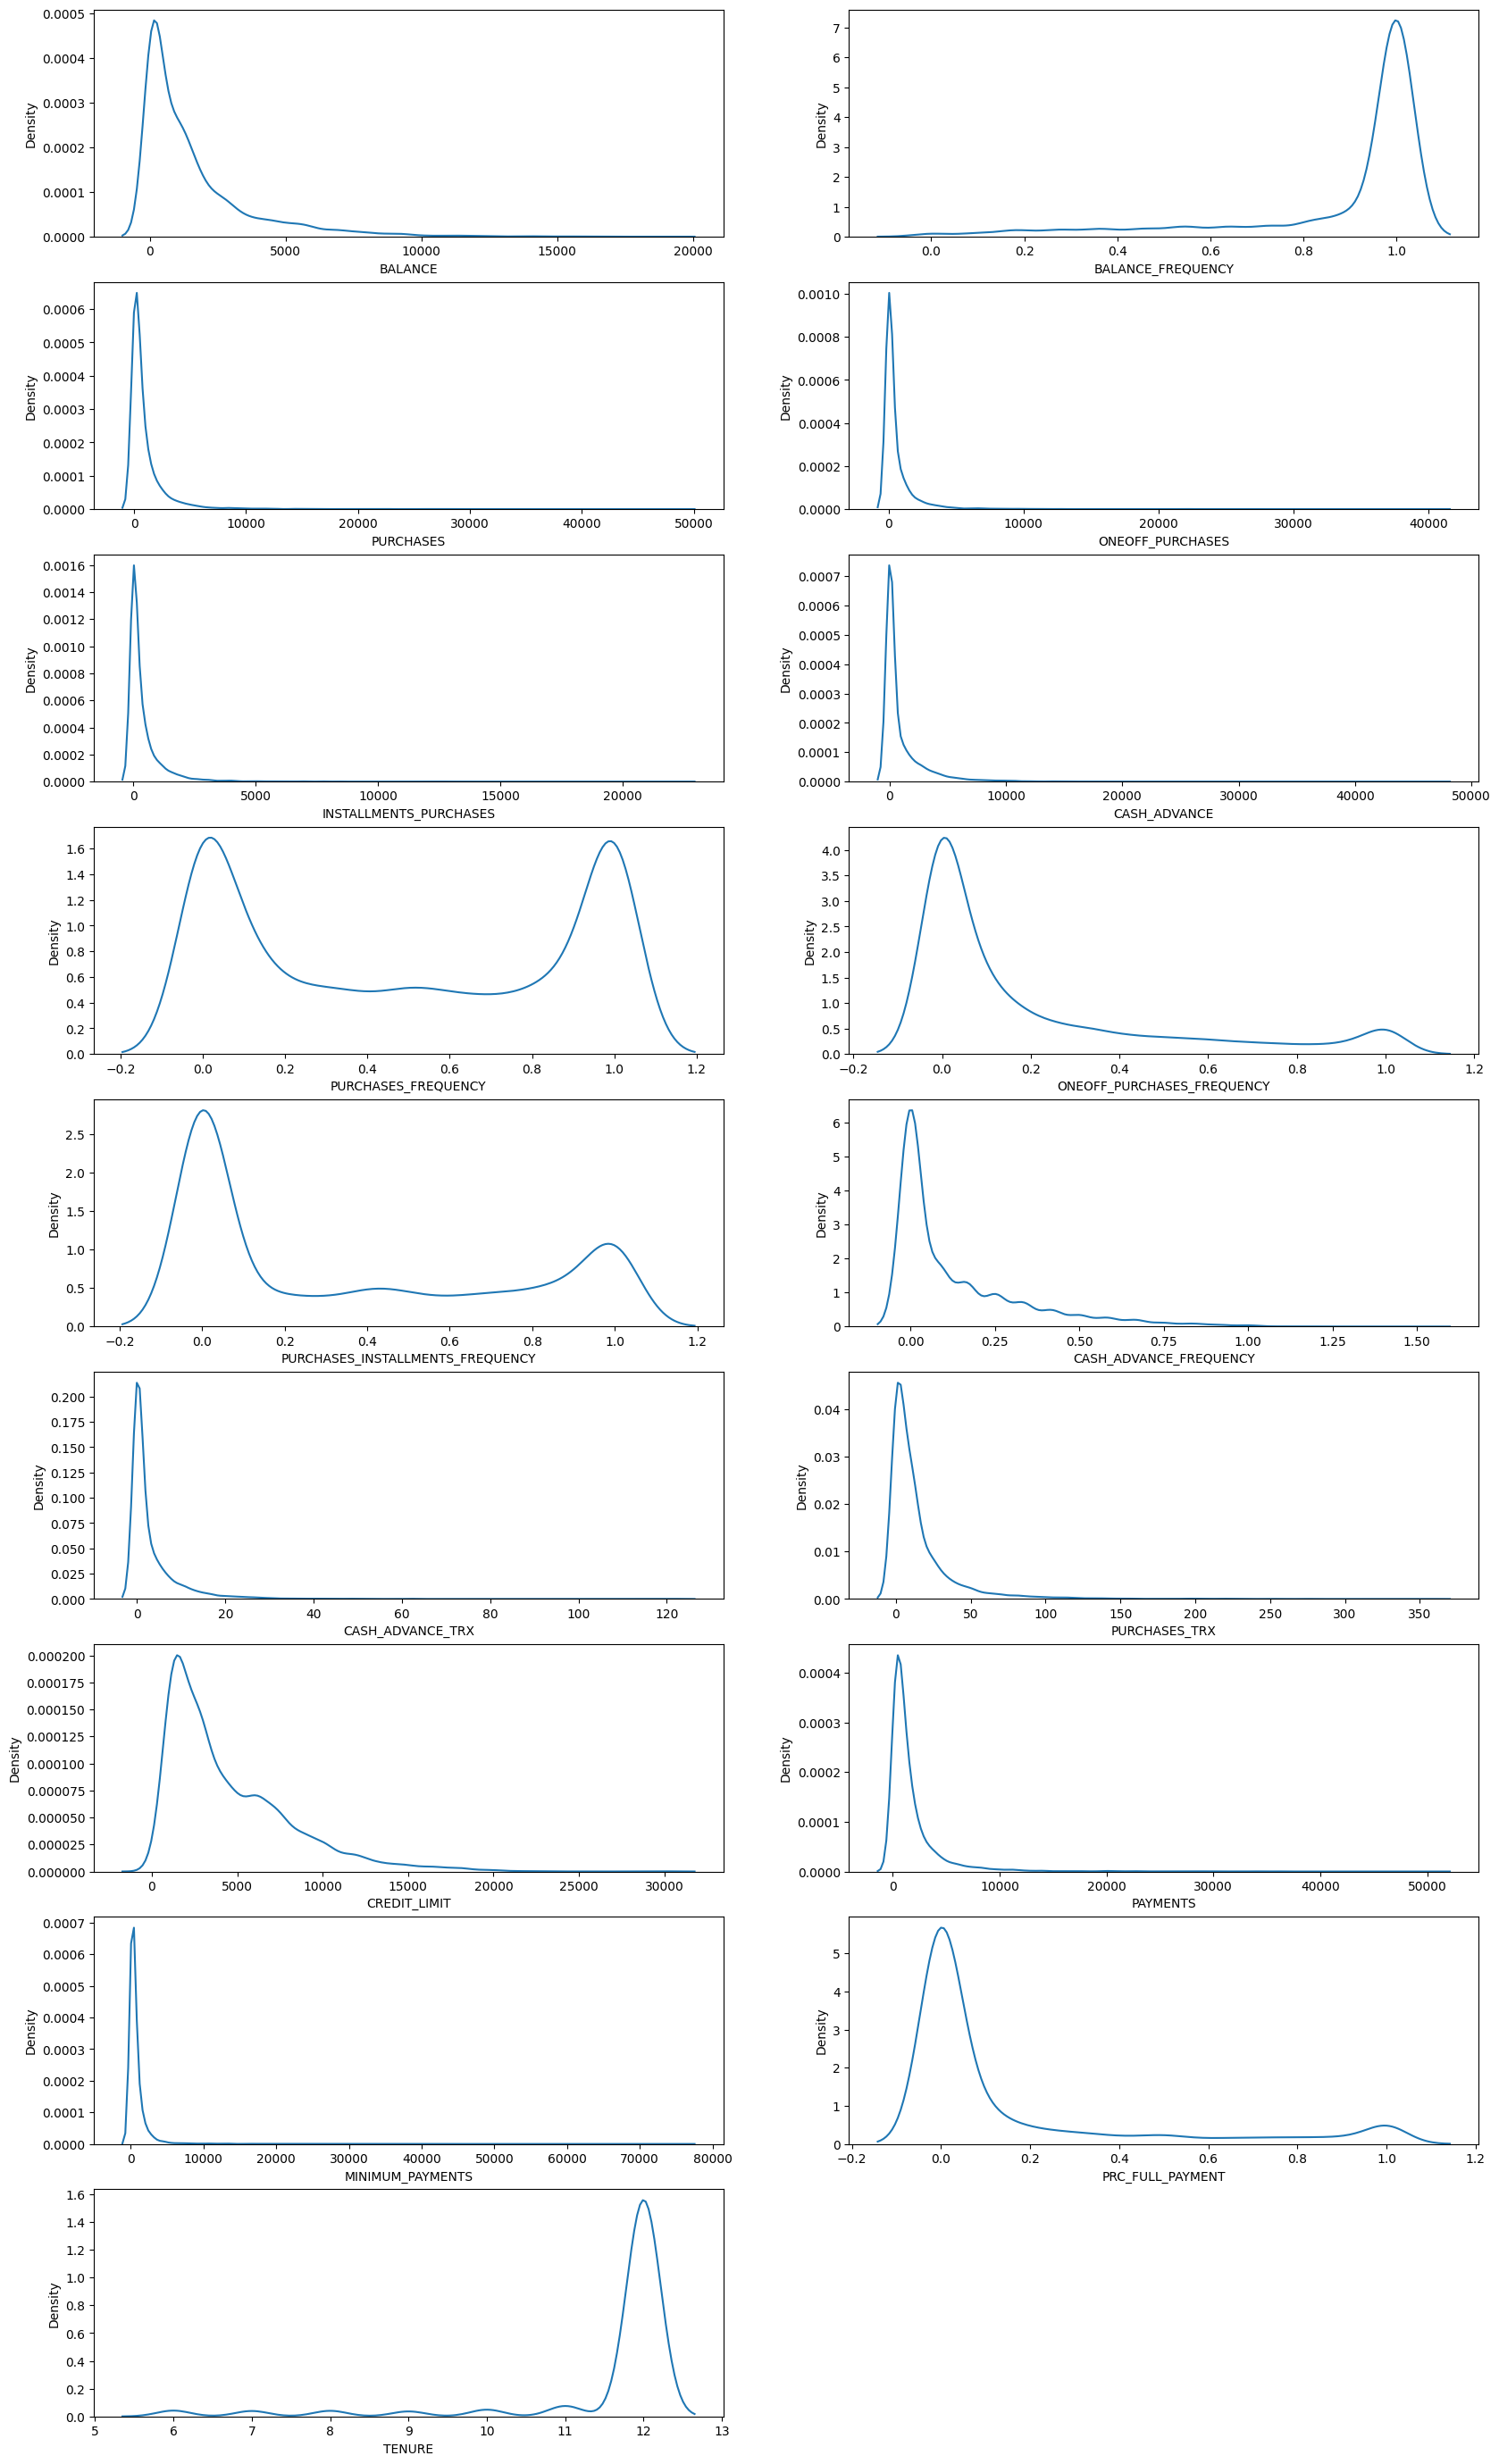

In [17]:
plt.figure(figsize=(20,35))
for i, col in enumerate(cc.columns):
    if cc[col].dtype != 'object':
        ax = plt.subplot(9, 2, i+1)
        sns.kdeplot(cc[col], ax=ax)
        plt.xlabel(col)
        
plt.show()

There is a lot of skewness and they are varied

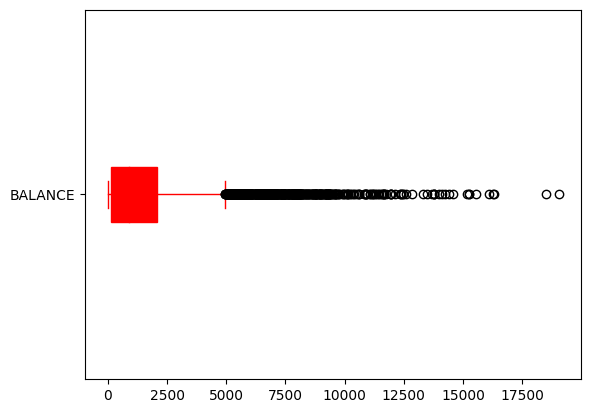

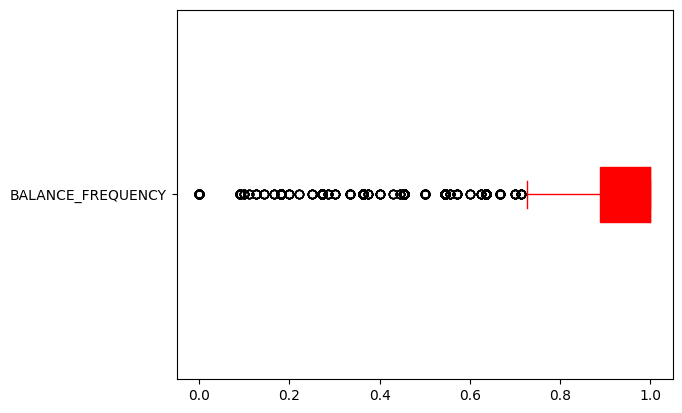

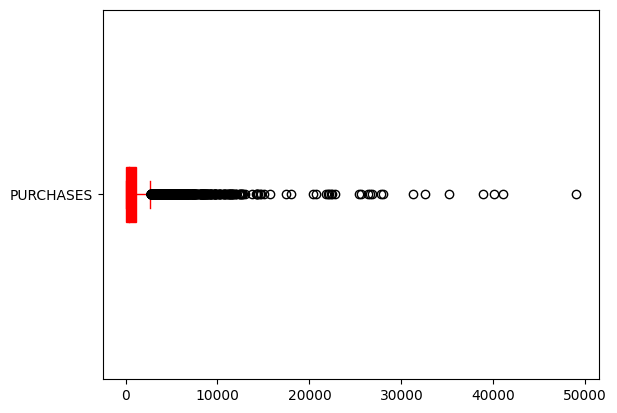

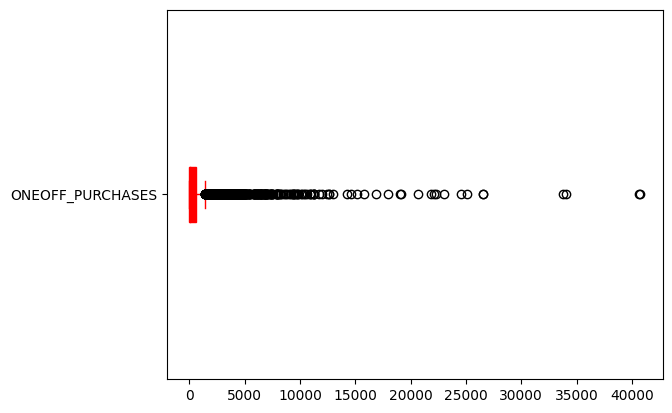

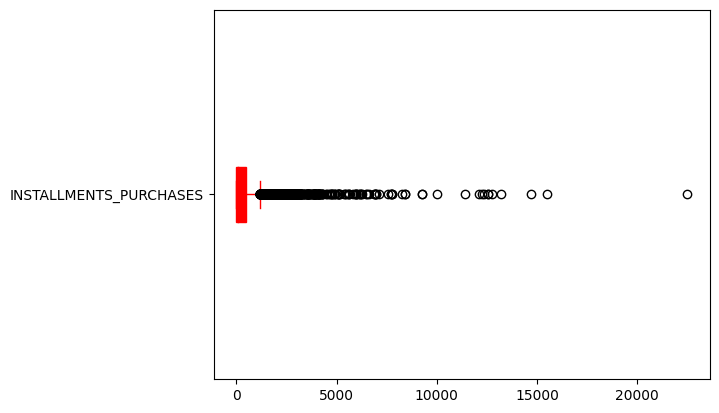

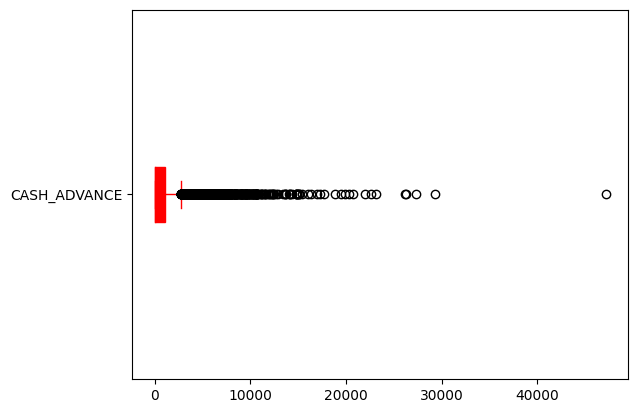

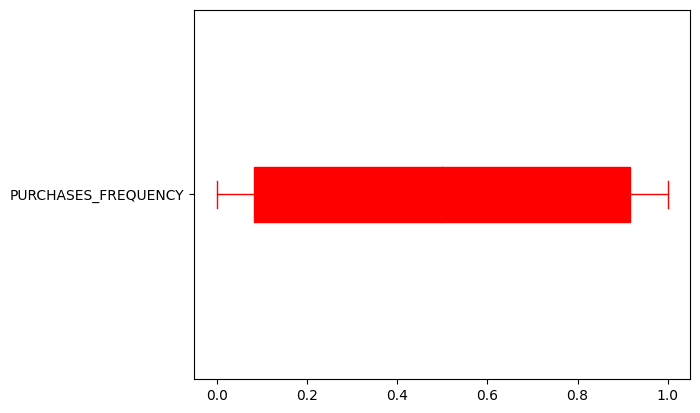

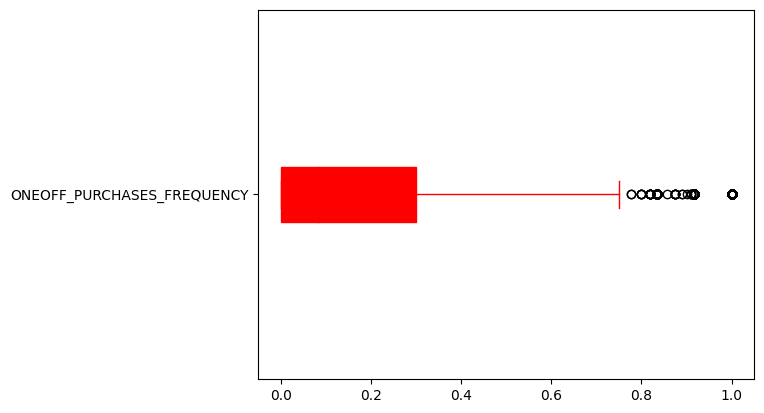

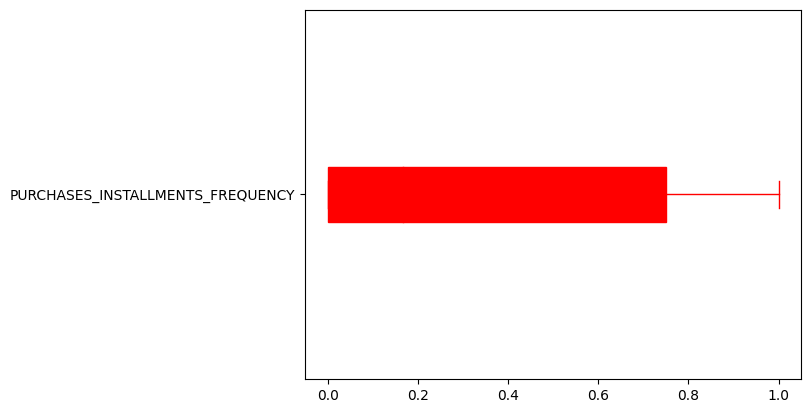

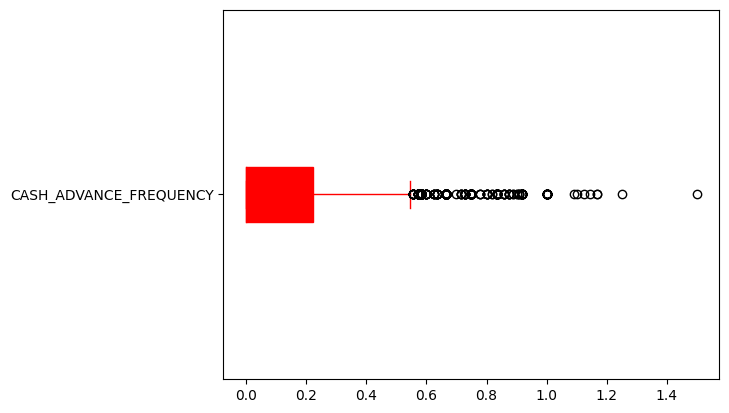

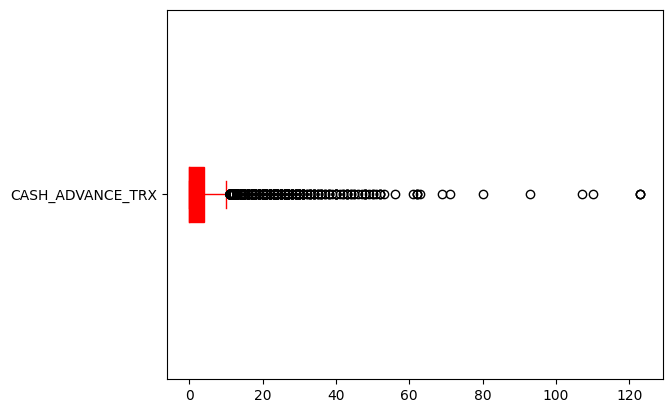

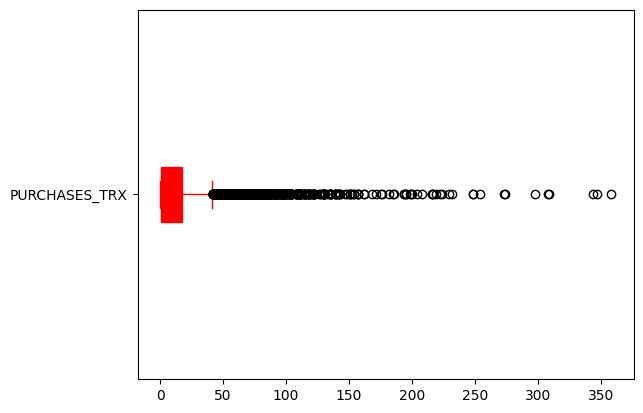

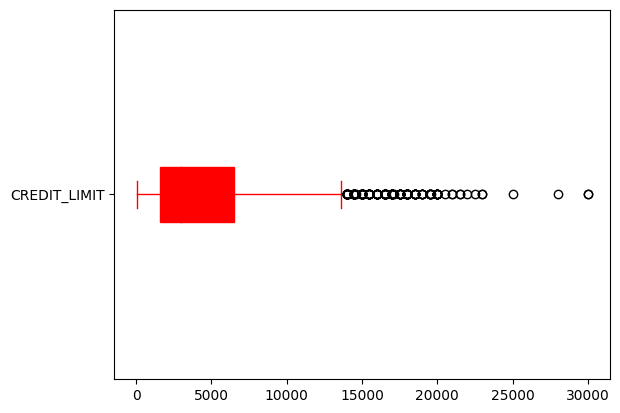

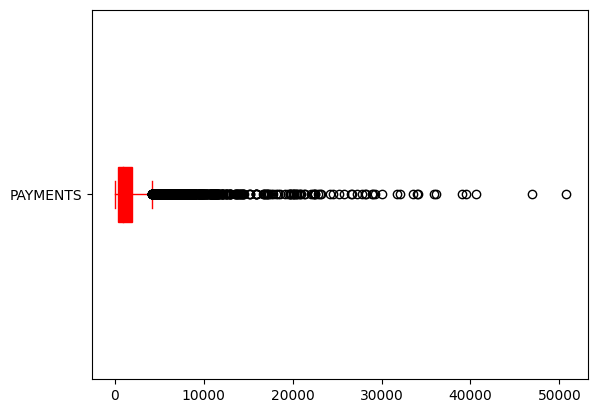

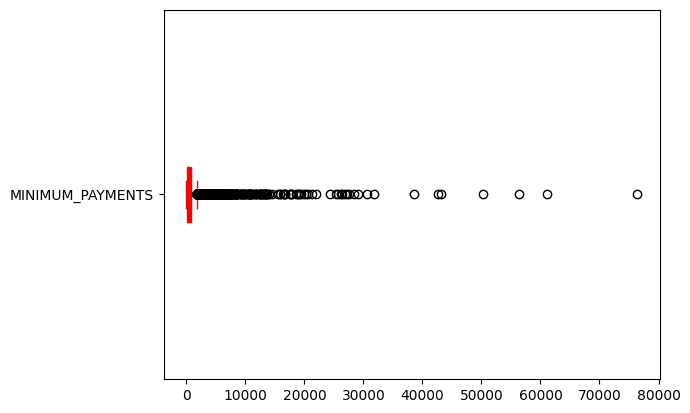

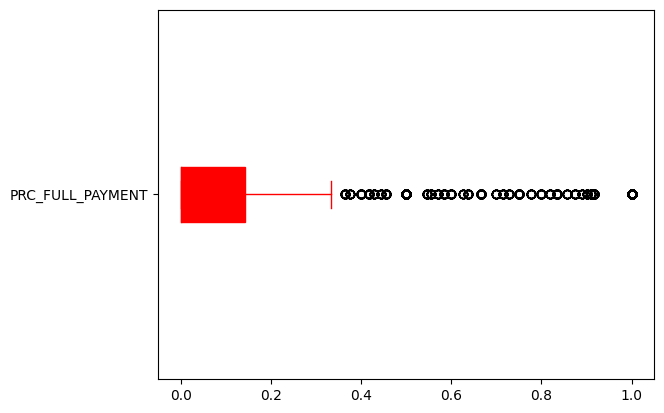

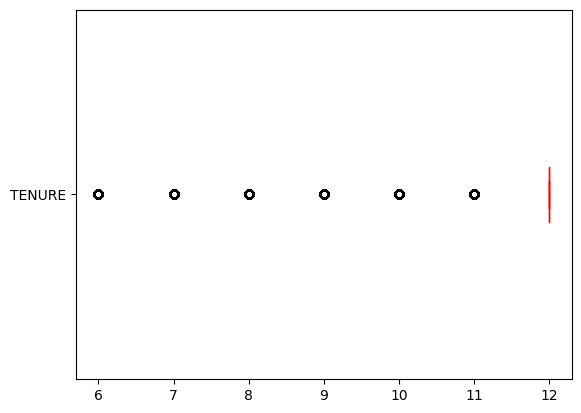

In [18]:
# Box Plot For whole data 
for col in cc_Numeric.columns:
    cc[col].plot.box(patch_artist = True, vert=False, color = 'r')
    plt.show()

In [19]:
from scipy import stats
# Calculate IQR, upper limit and lower limit 

for col in cc_Numeric.columns:
    IQR = stats.iqr(cc[col])
    print("\nIQR of", col, ":",IQR)
    UL = cc[col].quantile(0.75) + 1.5*IQR
    LL = cc[col].quantile(0.25) - 1.5*IQR
    print("No. of Outliers in Upper limit in",col,":", len(cc[cc[col] > UL]))
    print("No. of Outliers in Lower limit in",col,":", len(cc[cc[col] < LL]))


IQR of BALANCE : 1925.85812
No. of Outliers in Upper limit in BALANCE : 695
No. of Outliers in Lower limit in BALANCE : 0

IQR of BALANCE_FREQUENCY : 0.11111099999999996
No. of Outliers in Upper limit in BALANCE_FREQUENCY : 0
No. of Outliers in Lower limit in BALANCE_FREQUENCY : 1493

IQR of PURCHASES : 1070.4950000000001
No. of Outliers in Upper limit in PURCHASES : 808
No. of Outliers in Lower limit in PURCHASES : 0

IQR of ONEOFF_PURCHASES : 577.405
No. of Outliers in Upper limit in ONEOFF_PURCHASES : 1013
No. of Outliers in Lower limit in ONEOFF_PURCHASES : 0

IQR of INSTALLMENTS_PURCHASES : 468.6375
No. of Outliers in Upper limit in INSTALLMENTS_PURCHASES : 867
No. of Outliers in Lower limit in INSTALLMENTS_PURCHASES : 0

IQR of CASH_ADVANCE : 1113.8211392500002
No. of Outliers in Upper limit in CASH_ADVANCE : 1030
No. of Outliers in Lower limit in CASH_ADVANCE : 0

IQR of PURCHASES_FREQUENCY : 0.833334
No. of Outliers in Upper limit in PURCHASES_FREQUENCY : 0
No. of Outliers in 

In [20]:
features = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']

In [21]:
# Checking for outliers

def outliers(cc , features):
    num_outliers = []
    pct_outliers = []
    total_rows = []
    interquartile_range = []
    for i in features:
        Q1 = cc[i].quantile(.25)
        Q3 = cc[i].quantile(.75)
        IQR = Q3 - Q1
        outliers = len(cc[(cc[i] < (Q1-1.5*IQR)) | (cc[i] > (Q3+1.5*IQR))])
        rows = len(cc[i])
        pct = outliers/rows
        interquartile_range.append(IQR)
        num_outliers.append(outliers)
        pct_outliers.append(pct)
        total_rows.append(rows)
        
    count_outliers = pd.DataFrame({'Feature': features, 'Num_Outliers': num_outliers, 'Percent_Outliers': pct_outliers, 'IQR': interquartile_range
                                   , 'Total_Rows': total_rows}).sort_values('Percent_Outliers', ascending=False)
    return count_outliers

count_outliers = outliers(cc = cc, features = features)
count_outliers

,Feature,Num_Outliers,Percent_Outliers,IQR,Total_Rows
1,BALANCE_FREQUENCY,1493,0.166816,0.111111,8950
15,PRC_FULL_PAYMENT,1474,0.164693,0.142857,8950
16,TENURE,1366,0.152626,0.000000,8950
5,CASH_ADVANCE,1030,0.115084,1113.821139,8950
3,ONEOFF_PURCHASES,1013,0.113184,577.405000,8950
14,MINIMUM_PAYMENTS,909,0.101564,617.855846,8950
4,INSTALLMENTS_PURCHASES,867,0.096872,468.637500,8950
13,PAYMENTS,808,0.090279,1517.858151,8950
2,PURCHASES,808,0.090279,1070.495000,8950
10,CASH_ADVANCE_TRX,804,0.089832,4.000000,8950


In [22]:
# Treat the outliers using z_score

for i in cc.columns:
    if i != 'CUST_ID':
        if i != 'TENURE':
            z = []
            z_score = stats.zscore(cc[i])
            print(z_score)
            z.append(z_score)

0      -0.731989
1       0.786961
2       0.447135
3       0.049099
4      -0.358775
          ...   
8945   -0.737950
8946   -0.742423
8947   -0.740398
8948   -0.745174
8949   -0.572575
Name: BALANCE, Length: 8950, dtype: float64
0      -0.249434
1       0.134325
2       0.518084
3      -1.016953
4       0.518084
          ...   
8945    0.518084
8946    0.518084
8947   -0.185477
8948   -0.185477
8949   -0.889033
Name: BALANCE_FREQUENCY, Length: 8950, dtype: float64
0      -0.424900
1      -0.469552
2      -0.107668
3       0.232058
4      -0.462063
          ...   
8945   -0.333293
8946   -0.329136
8947   -0.401965
8948   -0.469552
8949    0.042146
Name: PURCHASES, Length: 8950, dtype: float64
0      -0.356934
1      -0.356934
2       0.108889
3       0.546189
4      -0.347294
          ...   
8945   -0.356934
8946   -0.356934
8947   -0.356934
8948   -0.356934
8949    0.301732
Name: ONEOFF_PURCHASES, Length: 8950, dtype: float64
0      -0.349079
1      -0.454576
2      -0.454576
3   

In [23]:
z_scores = stats.zscore(cc)

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_cc = cc[filtered_entries]

print(new_cc)

          BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
3     1666.670542           0.636364    1499.00           1499.00   
4      817.714335           1.000000      16.00             16.00   
...           ...                ...        ...               ...   
8876   121.294493           0.750000     385.26            385.26   
8877    55.147722           0.875000     163.31              0.00   
8878   869.328293           0.750000       0.00              0.00   
8879   137.744895           1.000000     441.00              0.00   
8880   331.070135           0.750000      81.20             81.20   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.9

In [24]:
new_cc.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


### (c) Deal with correlated variables

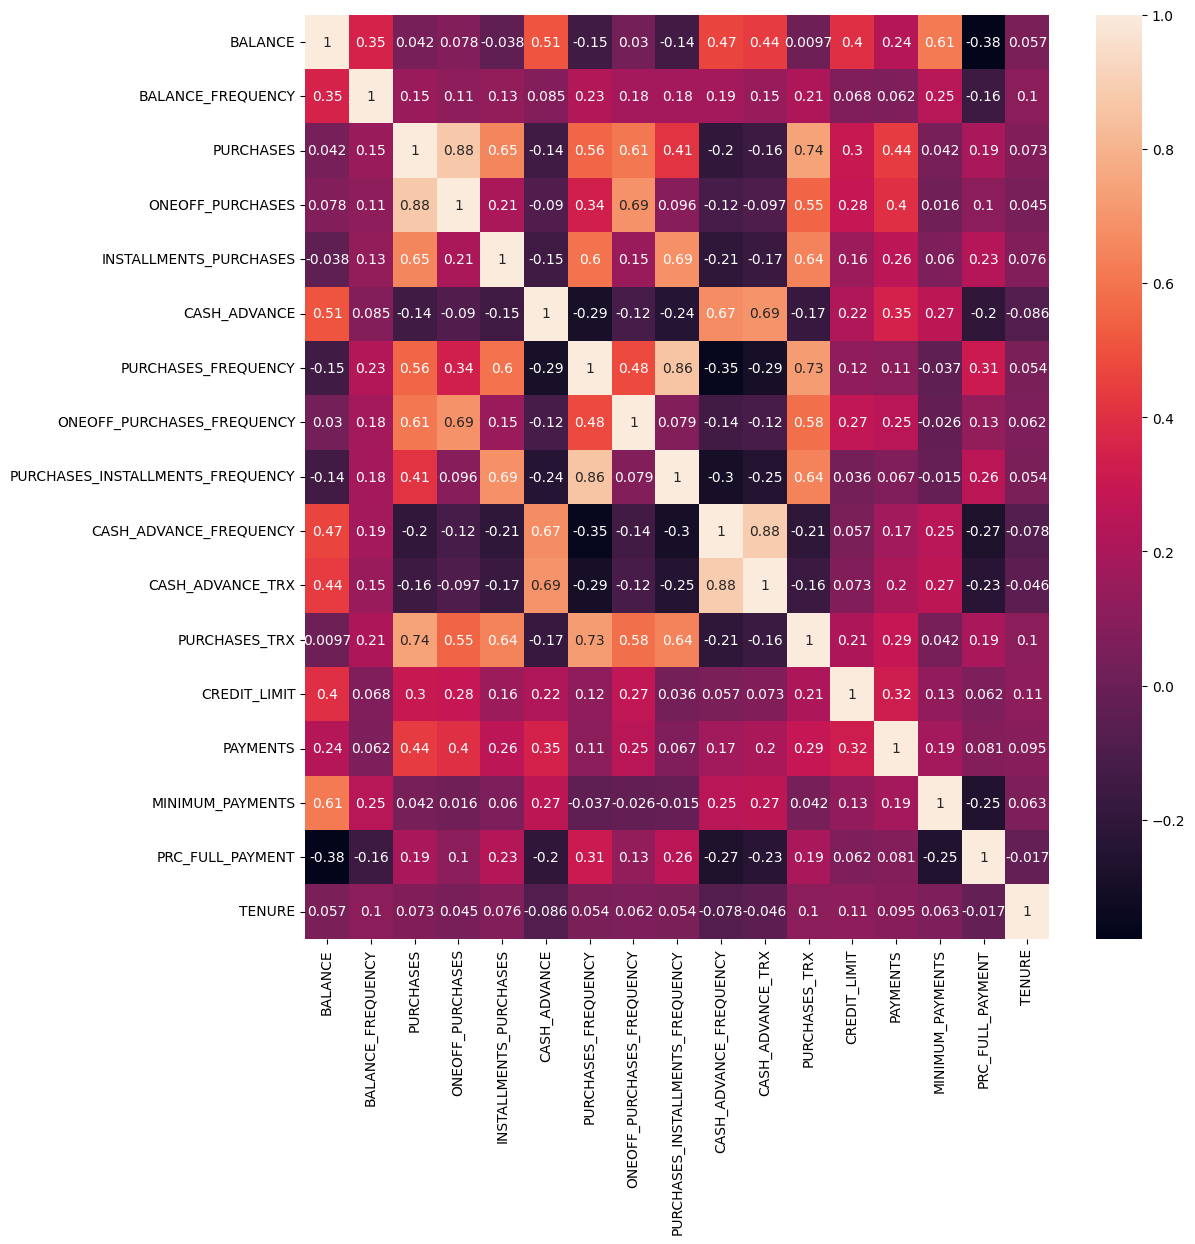

In [25]:
# CORRELATION MATRIX
plt.figure(figsize=(12,12))
sns.heatmap(new_cc.corr(), annot=True)
plt.show()

In [26]:
# Using VIF to deal with correlated features
from statsmodels.stats.outliers_influence import variance_inflation_factor
def cal_vif(dataset):
    vif = pd.DataFrame()
    vif["features"] = dataset.columns
    vif["VIF_Values"] = [variance_inflation_factor(dataset.values, i) for i in range(dataset.shape[1])]
    return(vif)

In [27]:
features = new_cc.iloc[:,:-1]
cal_vif(features)

,features,VIF_Values
0,BALANCE,4.794964
1,BALANCE_FREQUENCY,6.436365
2,PURCHASES,24805.554812
3,ONEOFF_PURCHASES,12504.561735
4,INSTALLMENTS_PURCHASES,5517.055695
5,CASH_ADVANCE,3.312528
6,PURCHASES_FREQUENCY,28.954916
7,ONEOFF_PURCHASES_FREQUENCY,7.650345
8,PURCHASES_INSTALLMENTS_FREQUENCY,21.726253
9,CASH_ADVANCE_FREQUENCY,7.656055


Droping the columns which are having VIF value greater than 10

In [28]:
new_cc.drop(['PURCHASES','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES', 'PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY'], axis = 1, inplace = True)

In [29]:
new_cc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7434 entries, 0 to 8880
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   BALANCE                     7434 non-null   float64
 1   BALANCE_FREQUENCY           7434 non-null   float64
 2   CASH_ADVANCE                7434 non-null   float64
 3   ONEOFF_PURCHASES_FREQUENCY  7434 non-null   float64
 4   CASH_ADVANCE_FREQUENCY      7434 non-null   float64
 5   CASH_ADVANCE_TRX            7434 non-null   int64  
 6   PURCHASES_TRX               7434 non-null   int64  
 7   CREDIT_LIMIT                7434 non-null   float64
 8   PAYMENTS                    7434 non-null   float64
 9   MINIMUM_PAYMENTS            7434 non-null   float64
 10  PRC_FULL_PAYMENT            7434 non-null   float64
 11  TENURE                      7434 non-null   int64  
dtypes: float64(9), int64(3)
memory usage: 755.0 KB


In [30]:
features = new_cc.iloc[:,:-1]
cal_vif(features)

,features,VIF_Values
0,BALANCE,4.720331
1,BALANCE_FREQUENCY,4.500991
2,CASH_ADVANCE,3.255285
3,ONEOFF_PURCHASES_FREQUENCY,2.334927
4,CASH_ADVANCE_FREQUENCY,7.445772
5,CASH_ADVANCE_TRX,6.776138
6,PURCHASES_TRX,2.836173
7,CREDIT_LIMIT,3.942836
8,PAYMENTS,2.550626
9,MINIMUM_PAYMENTS,2.644030


## Dimensionality reduction using PCA such that the 95% of the variance is explained

In [31]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_red = pca.fit_transform(new_cc)

In [32]:
X_red.shape

(7434, 4)

Four Principle component has been taken that explains 95% of the variance 

In [33]:
new_cc1 = pd.DataFrame(X_red)

In [34]:
new_cc1.head()

,0,1,2,3
0,-3458.539306,-571.681484,-188.912906,156.228034
1,4714.444765,4304.718716,1453.622656,3335.277367
2,3357.207583,-1053.251361,-1337.051280,-629.393067
3,3021.772980,-1778.860453,-1429.421061,110.388459
4,-2963.374532,48.303825,-168.896490,-275.022305


## optimum value of k for k-means clustering using the elbow method

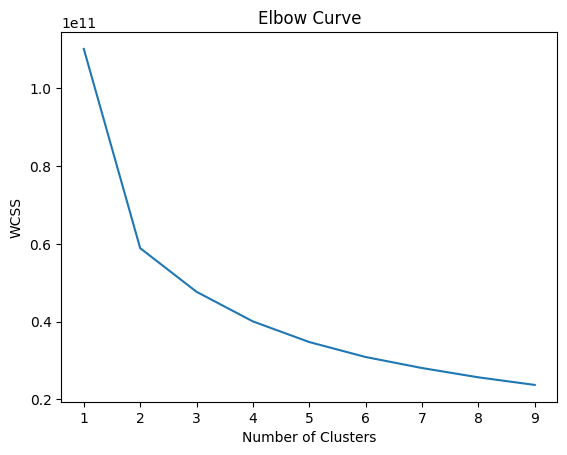

In [247]:
from sklearn.cluster import KMeans

kmeans_models = [KMeans(n_clusters=k, random_state=23).fit(X_red) for k in range (1, 10)]
innertia = [model.inertia_ for model in kmeans_models]

plt.plot(range(1, 10), innertia)
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

You see the elbow there? It seems like the elbow is around 2 or 3  . We will use silhouette score to see which one performs better

## optimum value of k for k-means clustering using the silhouette score method 

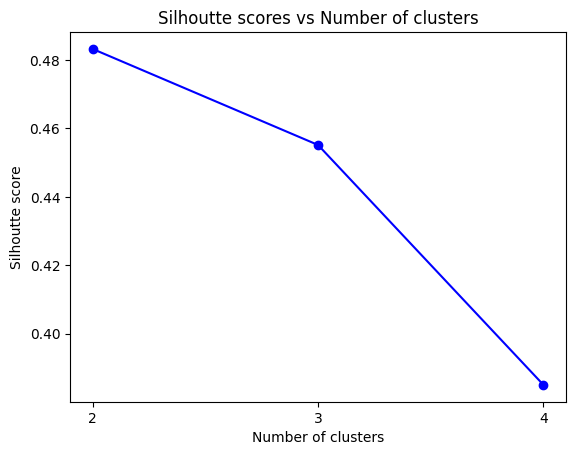

In [36]:
from sklearn.metrics import silhouette_score

silhoutte_scores = [silhouette_score(X_red, model.labels_) for model in kmeans_models[1:4]]
plt.plot(range(2,5), silhoutte_scores, "bo-")
plt.xticks([2, 3, 4])
plt.title('Silhoutte scores vs Number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhoutte score')
plt.show()

#### n=2 seems to have higher silhouette than the other two , so we will select 2 as our number of clusters.

### Model Evaluation and Inference


In [37]:
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=2, random_state=23)
kmeans.fit(X_red)

print('Silhoutte score of our model is ' + str(silhouette_score(X_red, kmeans.labels_)))

Silhoutte score of our model is 0.48321200008324944


In [38]:
# Adding cluster number in the data
new_cc1['cluster_pca'] = kmeans.predict(X_red)

In [39]:
new_cc1.head()

,0,1,2,3,cluster_pca
0,-3458.539306,-571.681484,-188.912906,156.228034,0
1,4714.444765,4304.718716,1453.622656,3335.277367,1
2,3357.207583,-1053.251361,-1337.051280,-629.393067,1
3,3021.772980,-1778.860453,-1429.421061,110.388459,1
4,-2963.374532,48.303825,-168.896490,-275.022305,0


In [40]:
new_cc1.cluster_pca.value_counts()

0    5130
1    2304
Name: cluster_pca, dtype: int64

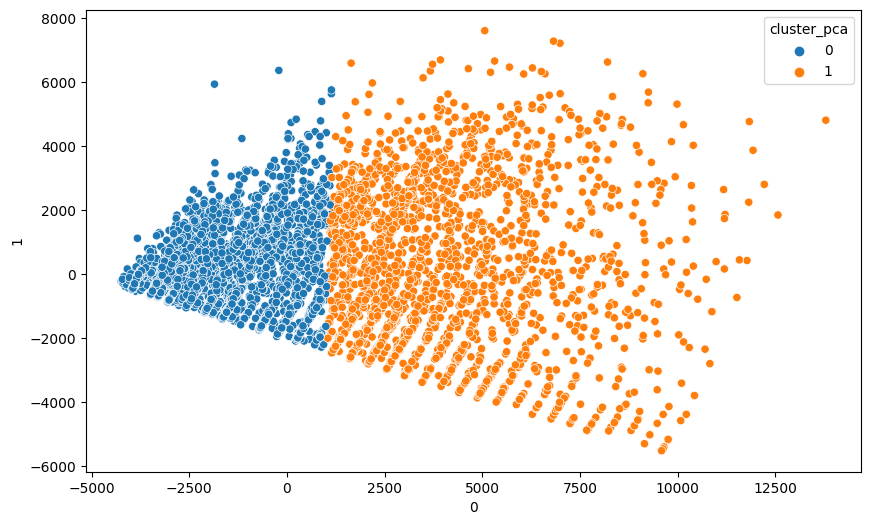

In [41]:
# Scatter plot of PC 0 and 1 
plt.figure(figsize=(10,6))
sns.scatterplot(data=new_cc1, x=0, y=1, hue='cluster_pca')
plt.show()

### for n=3 seems to be an elbow so I wonder what would the model look like with 3 clusters lets see

In [42]:
kmeans = KMeans(n_clusters=3, random_state=23)
kmeans.fit(X_red)

KMeans(n_clusters=3, random_state=23)

In [43]:
new_cc1['cluster_id'] = kmeans.predict(X_red)

<AxesSubplot: xlabel='cluster_id', ylabel='count'>

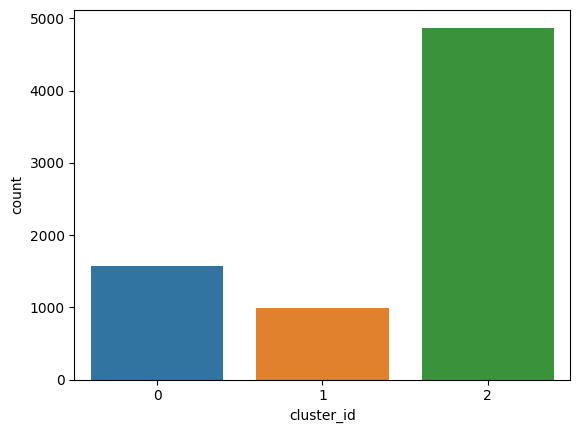

In [44]:
# Bar plot of the Clusters
sns.countplot(data = new_cc1 , x = 'cluster_id')

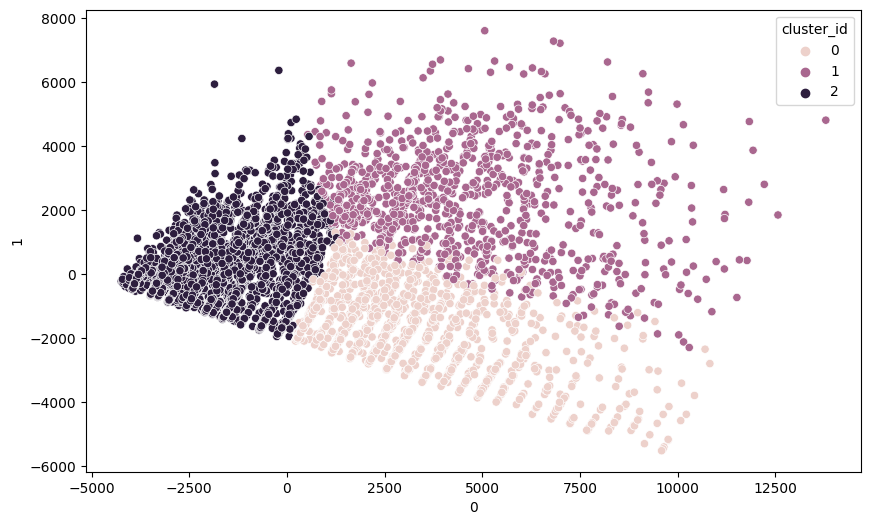

In [45]:
# Scatter plot of PC 0 and 1 
plt.figure(figsize=(10,6))
sns.scatterplot(data=new_cc1, x=0, y=1, hue='cluster_id')
plt.show()